In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/unique-categories.csv
input/unique-categories.sorted-by-count.csv
input/summer-products-with-rating-and-performance_2020-08.csv


In [2]:
salesData = pd.read_csv("input/summer-products-with-rating-and-performance_2020-08.csv")
salesData.head(3)

title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   16.0            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress    8.0            22   
2  2020 New Arrival Women Spring and Summer Beach...    8.0            43   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000               1    3.45          6135   
2            EUR         100               0    3.57            14   

   rating_five_count  ...  merchant_rating_count  merchant_rating  \
0               26.0  ...                    568         4.128521   
1             2269.0  ...                  17752         3.899673   
2                5.0  ...                    295         3.989831   

                merchant_id  merchant_has_profile_picture  \
0  595097d6a26f6e070cb878d1                             0   
1  56458aa03a698c35c9050988                             0   
2  5d464a1ffdf7bc44ee933c65                             0   

   merchant_profile_picture                                      product_url  \
0                       NaN  https://www.wish.com/c/5e9ae51d43d6a96e303acdb0   
1                       NaN  https://www.wish.com/c/58940d436a0d3d5da4e95a38   
2                       NaN  https://www.wish.com/c/5ea10e2c617580260d55310a   

                                     product_picture  \
0  https://contestimg.wish.com/api/webimage/5e9ae...   
1  https://contestimg.wish.com/api/webimage/58940...   
2  https://contestimg.wish.com/api/webimage/5ea10...   

                 product_id   theme crawl_month  
0  5e9ae51d43d6a96e303acdb0  summer     2020-08  
1  58940d436a0d3d5da4e95a38  summer     2020-08  
2  5ea10e2c617580260d55310a  summer     2020-08  

[3 rows x 43 columns]

In [3]:
salesData['crawl_month'].value_counts()

2020-08    1573
Name: crawl_month, dtype: int64

In [4]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

# Check Five Star Null Ratings

In [5]:
salesData[salesData['rating_five_count'].isnull()].head()

title  \
74   Fashion Women Sleeveless Lace Vest Loose V Nec...   
112  Womens Summer Fashion Lip Print 2pc Set Ladies...   
126  Women's Casual Sleeveless Stripe T Shirts Dres...   
189  Jupe de tennis plissée extensible Active Skort...   
216  Women's Sexy Push Up Bikini Sexy Vintage Set S...   

                                            title_orig  price  retail_price  \
74   Fashion Women Sleeveless Lace Vest Loose V Nec...   8.00            33   
112  Womens Summer Fashion Lip Print 2pc Set Ladies...   5.00            51   
126  Women's Casual Sleeveless Stripe T Shirts Dres...   2.72             9   
189  Women's Active Skort Athletic Stretchy Pleated...   5.00             5   
216  Women's Sexy Push Up Bikini Vintage Set Sexy B...  11.00            30   

    currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
74             EUR          10               0     5.0             0   
112            EUR          10               0     5.0             0   
126            EUR           1               0     5.0             0   
189            EUR          10               0     5.0             0   
216            EUR          10               0     5.0             0   

     rating_five_count  ...  merchant_rating_count  merchant_rating  \
74                 NaN  ...                   1496         4.169786   
112                NaN  ...                    295         3.989831   
126                NaN  ...                    378         3.597884   
189                NaN  ...                    129         3.837209   
216                NaN  ...                  22621         4.295124   

                  merchant_id  merchant_has_profile_picture  \
74   592955ef980a346d826f7bfc                             0   
112  5d464a1ffdf7bc44ee933c65                             0   
126  5d417e7070327a2743021677                             0   
189  5a3231f2e62bbc45b0bda1dd                             0   
216  56025ed8293a5b2d24779bde                             0   

     merchant_profile_picture  \
74                        NaN   
112                       NaN   
126                       NaN   
189                       NaN   
216                       NaN   

                                         product_url  \
74   https://www.wish.com/c/5ed0dfc51fa8446451b19c0d   
112  https://www.wish.com/c/5eb90ab5ad67f63678d15ed9   
126  https://www.wish.com/c/5ed3ae8e7bf8821d5cf4bc64   
189  https://www.wish.com/c/5ed1c059630f990d1d44592c   
216  https://www.wish.com/c/573db9316b335c34ca0513b8   

                                       product_picture  \
74   https://contestimg.wish.com/api/webimage/5ed0d...   
112  https://contestimg.wish.com/api/webimage/5eb90...   
126  https://contestimg.wish.com/api/webimage/5ed3a...   
189  https://contestimg.wish.com/api/webimage/5ed1c...   
216  https://contestimg.wish.com/api/webimage/573db...   

                   product_id   theme crawl_month  
74   5ed0dfc51fa8446451b19c0d  summer     2020-08  
112  5eb90ab5ad67f63678d15ed9  summer     2020-08  
126  5ed3ae8e7bf8821d5cf4bc64  summer     2020-08  
189  5ed1c059630f990d1d44592c  summer     2020-08  
216  573db9316b335c34ca0513b8  summer     2020-08  

[5 rows x 43 columns]

# Replace NA ratings with 0

In [6]:
salesData['rating_five_count'] = salesData['rating_five_count'].replace(np.nan, 0)
salesData['rating_four_count'] = salesData['rating_four_count'].replace(np.nan, 0)
salesData['rating_three_count'] = salesData['rating_three_count'].replace(np.nan, 0)
salesData['rating_two_count'] = salesData['rating_two_count'].replace(np.nan, 0)
salesData['rating_one_count'] = salesData['rating_one_count'].replace(np.nan, 0)

In [7]:
salesData.isnull().any()

title                           False
title_orig                      False
price                           False
retail_price                    False
currency_buyer                  False
units_sold                      False
uses_ad_boosts                  False
rating                          False
rating_count                    False
rating_five_count               False
rating_four_count               False
rating_three_count              False
rating_two_count                False
rating_one_count                False
badges_count                    False
badge_local_product             False
badge_product_quality           False
badge_fast_shipping             False
tags                            False
product_color                    True
product_variation_size_id        True
product_variation_inventory     False
shipping_option_name            False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_to

In [8]:
salesData[salesData['has_urgency_banner'].isnull()].head()

title  \
3  Hot Summer Cool T-shirt pour les femmes Mode T...   
5  Plus la taille d'été femmes décontracté sans m...   
6  Women Fashion Loose Lace Blouse Blouse V Neck ...   
7  Robe tunique ample femme Robe d'été Robe en je...   
9  Femmes d'été, plus la taille décontractée lâch...   

                                          title_orig  price  retail_price  \
3  Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
5  Plus Size Summer Women Casual Sleeveless Rompe...   3.92             9   
6  Women Fashion Loose Lace Blouse V Neck Bat Sle...   7.00             6   
7  Women's Baggy Tunic Dress Summer Dress Denim D...  12.00            11   
9  Summer Women Plus Size Casual Loose V Neck Sho...   5.78            22   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
3            EUR        5000               1    4.03           579   
5            EUR          10               0    5.00             1   
6            EUR       50000               0    3.84          6742   
7            EUR        1000               0    3.76           286   
9            EUR        5000               0    3.60           687   

   rating_five_count  ...  merchant_rating_count  merchant_rating  \
3              295.0  ...                  23832         4.020435   
5                1.0  ...                     65         3.507692   
6             3172.0  ...                  10194         4.076516   
7              120.0  ...                    342         3.681287   
9              287.0  ...                   5534         3.999819   

                merchant_id  merchant_has_profile_picture  \
3  58cfdefdacb37b556efdff7c                             0   
5  5e4b9c3801ba9d210036fc5a                             0   
6  5652f4053a698c76dc9a3f37                             1   
7  5d45349676befe65691dcfbb                             0   
9  5ba2251b4315d12ebce873fa                             0   

                            merchant_profile_picture  \
3                                                NaN   
5                                                NaN   
6  https://s3-us-west-1.amazonaws.com/sweeper-pro...   
7                                                NaN   
9                                                NaN   

                                       product_url  \
3  https://www.wish.com/c/5cedf17ad1d44c52c59e4aca   
5  https://www.wish.com/c/5ec645bafd107a02279c8c54   
6  https://www.wish.com/c/5c63a337d5e2ce4bbb3152cf   
7  https://www.wish.com/c/5e0ae5ebc2efb76ccf0a3391   
9  https://www.wish.com/c/5ccfaf238a8d535cec2dfb47   

                                     product_picture  \
3  https://contestimg.wish.com/api/webimage/5cedf...   
5  https://contestimg.wish.com/api/webimage/5ec64...   
6  https://contestimg.wish.com/api/webimage/5c63a...   
7  https://contestimg.wish.com/api/webimage/5e0ae...   
9  https://contestimg.wish.com/api/webimage/5ccfa...   

                 product_id   theme crawl_month  
3  5cedf17ad1d44c52c59e4aca  summer     2020-08  
5  5ec645bafd107a02279c8c54  summer     2020-08  
6  5c63a337d5e2ce4bbb3152cf  summer     2020-08  
7  5e0ae5ebc2efb76ccf0a3391  summer     2020-08  
9  5ccfaf238a8d535cec2dfb47  summer     2020-08  

[5 rows x 43 columns]

# Replace NA Urgency Banner with 0

In [9]:
salesData['has_urgency_banner'] = salesData['has_urgency_banner'].replace(np.nan, 0)

# Origin Country - Data Analysis

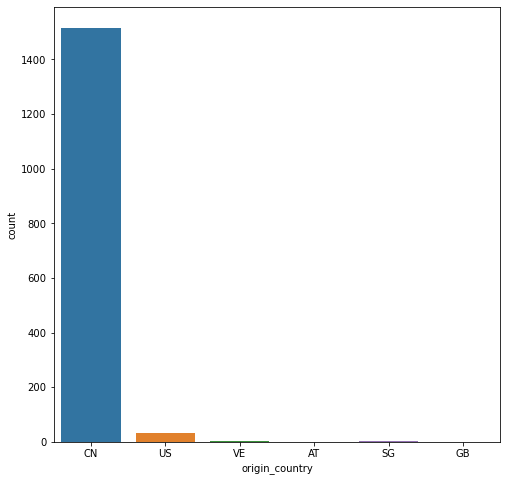

In [10]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('origin_country',
              data = salesData,
              ax = ax)

**China and US are the prominent countries. Since other countries have less contribution for the set, those items were replaced with 'Other'**

In [11]:
salesData['origin_country'] = salesData['origin_country'].replace(np.nan, 'Other')
salesData['origin_country'] = salesData['origin_country'].replace('VE', 'Other')
salesData['origin_country'] = salesData['origin_country'].replace('SG', 'Other')
salesData['origin_country'] = salesData['origin_country'].replace('AT', 'Other')
salesData['origin_country'] = salesData['origin_country'].replace('GB', 'Other')

In [12]:
# pr_ct = salesData['origin_country'].value_counts()
# pr_ct

sns.countplot('origin_country',
              data = salesData)

In [13]:
salesData.isnull().any()

title                           False
title_orig                      False
price                           False
retail_price                    False
currency_buyer                  False
units_sold                      False
uses_ad_boosts                  False
rating                          False
rating_count                    False
rating_five_count               False
rating_four_count               False
rating_three_count              False
rating_two_count                False
rating_one_count                False
badges_count                    False
badge_local_product             False
badge_product_quality           False
badge_fast_shipping             False
tags                            False
product_color                    True
product_variation_size_id        True
product_variation_inventory     False
shipping_option_name            False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_to

# Product Variation - Data Analysis

In [14]:
pr_var = salesData['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S               641
XS              356
M               200
XXS             100
L                49
S.               18
XL               17
XXL              15
XXXS              6
4XL               5
XS.               5
s                 5
Size S            5
SIZE XS           4
Size-XS           4
2XL               4
M.                4
SizeL             3
Size-S            3
10 ml             3
2pcs              3
34                3
33                3
35                2
SIZE-XXS          2
3XL               2
size S            2
Size -XXS         2
25                2
Size M            2
Size4XL           2
1                 2
XXXXXL            2
S(bust 88cm)      2
Size S.           2
5XL               2
1 pc.             2
S Pink            2
Suit-S            2
One Size          2
EU 35             2
29                2
XXXXL             2
Name: product_variation_size_id, dtype: int64

In [15]:
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('S.', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('XS.', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('M.', 'M')

salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size S', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size-XS', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('SIZE XS', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size-S', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size4XL', 'XL')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('size S', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size M', 'M')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size -XXS', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('SIZE-XXS', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size S.', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('s', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('SizeL', 'L')

salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('5XL', 'XL')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('4XL', 'XL')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('3XL', 'XL')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('2XL', 'XL')

In [16]:
pr_var = salesData['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S               693
XS              356
M               206
XXS             100
L                52
XL               32
XXL              15
XXXS              6
34                3
10 ml             3
33                3
2pcs              3
1 pc.             2
S Pink            2
XXXXXL            2
1                 2
Suit-S            2
One Size          2
35                2
S(bust 88cm)      2
25                2
XXXXL             2
29                2
EU 35             2
Name: product_variation_size_id, dtype: int64

In [17]:
def pr_var(name):
    if name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'XXXXL' \
    or name == 'XXXXXL':
        return name
    else:
        return "OTHER"
    
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace(np.nan, 'OTHER')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].apply(pr_var)

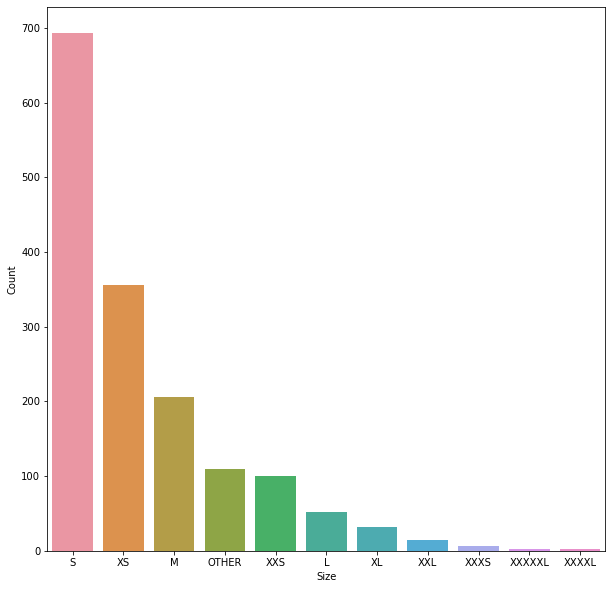

In [18]:
# pr_var = salesData['product_variation_size_id'].value_counts()
# pr_var[pr_var > 1]

fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = salesData['product_variation_size_id'].value_counts().index,
              data = salesData,
              ax = ax)
ax.set(xlabel='Size', ylabel='Count')
plt.show()

In [19]:
salesData.isnull().any()

title                           False
title_orig                      False
price                           False
retail_price                    False
currency_buyer                  False
units_sold                      False
uses_ad_boosts                  False
rating                          False
rating_count                    False
rating_five_count               False
rating_four_count               False
rating_three_count              False
rating_two_count                False
rating_one_count                False
badges_count                    False
badge_local_product             False
badge_product_quality           False
badge_fast_shipping             False
tags                            False
product_color                    True
product_variation_size_id       False
product_variation_inventory     False
shipping_option_name            False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_to

# Product Color - Data Analysis

In [20]:
pr_colr = salesData['product_color'].value_counts()
pr_colr[pr_colr > 2]

black               302
white               254
yellow              105
pink                 99
blue                 99
red                  93
green                90
grey                 71
purple               53
armygreen            31
navyblue             28
winered              28
orange               27
multicolor           20
beige                14
lightblue            12
khaki                12
gray                 11
white & green        10
skyblue               8
rosered               8
coffee                7
brown                 7
darkblue              6
rose                  5
floral                5
black & green         4
lightpink             4
fluorescentgreen      4
navy                  4
leopard               4
White                 3
Black                 3
black & white         3
lightgreen            3
camouflage            3
orange-red            3
Name: product_color, dtype: int64

In [21]:
salesData['product_color'] = salesData['product_color'].replace('Black', 'black')
salesData['product_color'] = salesData['product_color'].replace('White', 'white')

salesData['product_color'] = salesData['product_color'].replace('navyblue', 'blue')
salesData['product_color'] = salesData['product_color'].replace('lightblue', 'blue')
salesData['product_color'] = salesData['product_color'].replace('skyblue', 'blue')
salesData['product_color'] = salesData['product_color'].replace('darkblue', 'blue')
salesData['product_color'] = salesData['product_color'].replace('navy', 'blue')

salesData['product_color'] = salesData['product_color'].replace('winered', 'red')
salesData['product_color'] = salesData['product_color'].replace('rosered', 'red')
salesData['product_color'] = salesData['product_color'].replace('rose', 'red')
salesData['product_color'] = salesData['product_color'].replace('orange-red', 'red')

salesData['product_color'] = salesData['product_color'].replace('lightpink', 'pink')

salesData['product_color'] = salesData['product_color'].replace('armygreen', 'green')
salesData['product_color'] = salesData['product_color'].replace('khaki', 'green')
salesData['product_color'] = salesData['product_color'].replace('lightgreen', 'green')
salesData['product_color'] = salesData['product_color'].replace('fluorescentgreen', 'green')

salesData['product_color'] = salesData['product_color'].replace('gray', 'grey')

salesData['product_color'] = salesData['product_color'].replace('coffee', 'brown')

salesData['product_color'] = salesData['product_color'].replace('multicolor', 'other')
salesData['product_color'] = salesData['product_color'].replace('floral', 'other')
salesData['product_color'] = salesData['product_color'].replace('leopard', 'other')
salesData['product_color'] = salesData['product_color'].replace('camouflage', 'other')

salesData['product_color'] = salesData['product_color'].replace('white & green', 'dual')
salesData['product_color'] = salesData['product_color'].replace('black & green', 'dual')
salesData['product_color'] = salesData['product_color'].replace('black & white', 'dual')
salesData['product_color'] = salesData['product_color'].replace('camouflage', 'other')
    
salesData['product_color'] = salesData['product_color'].replace(np.nan, 'other')

pr_colr = salesData['product_color'].value_counts()
pr_colr[pr_colr > 2]

black     305
white     257
blue      157
green     140
red       137
yellow    105
pink      103
grey       82
other      73
purple     53
orange     27
dual       17
beige      14
brown      14
Name: product_color, dtype: int64

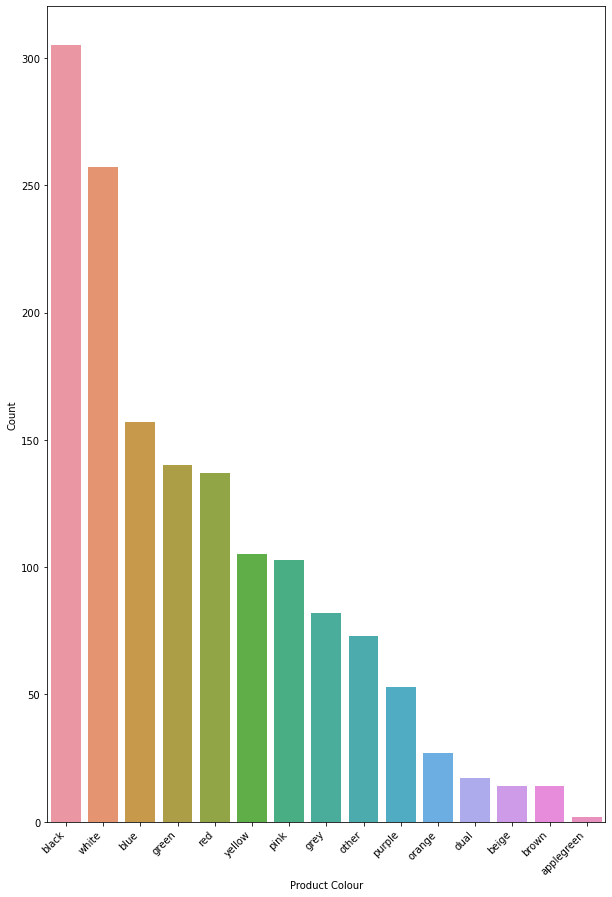

In [22]:
# Show Most popular colors
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_color',
              data = salesData,
              order = salesData['product_color'].value_counts().iloc[:15].index,
              ax = ax)
ax.set(xlabel='Product Colour', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
salesData['product_color'] = salesData['product_color'].replace(np.nan, 'other')
salesData.isnull().any()

title                           False
title_orig                      False
price                           False
retail_price                    False
currency_buyer                  False
units_sold                      False
uses_ad_boosts                  False
rating                          False
rating_count                    False
rating_five_count               False
rating_four_count               False
rating_three_count              False
rating_two_count                False
rating_one_count                False
badges_count                    False
badge_local_product             False
badge_product_quality           False
badge_fast_shipping             False
tags                            False
product_color                   False
product_variation_size_id       False
product_variation_inventory     False
shipping_option_name            False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_to

# Units Sold - Data Analysis

In [24]:
pr_unit = salesData['units_sold'].value_counts()
pr_unit

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
3           2
2           2
6           1
Name: units_sold, dtype: int64

In [25]:
def pr_units(item):
    if item == 10 \
    or item == 50 \
    or item == 100 \
    or item == 1000 \
    or item == 5000 \
    or item == 10000 \
    or item == 20000 \
    or item == 50000 \
    or item == 100000:
        return item
    else:
        return 10
    
# def pr_units(item):
#     if item == 10:
#         return 1
#     elif item == 50:
#         return 2
#     elif item == 100:
#         return 3
#     elif item == 1000:
#         return 4
#     elif item == 5000:
#         return 5
#     elif item == 10000:
#         return 6
#     elif item == 20000:
#         return 7
#     elif item == 50000:
#         return 8
#     elif item == 100000:
#         return 9
#         return item
#     else:
#         return 1
    
salesData['units_sold'] = salesData['units_sold'].apply(pr_units)
pr_unit = salesData['units_sold'].value_counts()
pr_unit

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: units_sold, dtype: int64

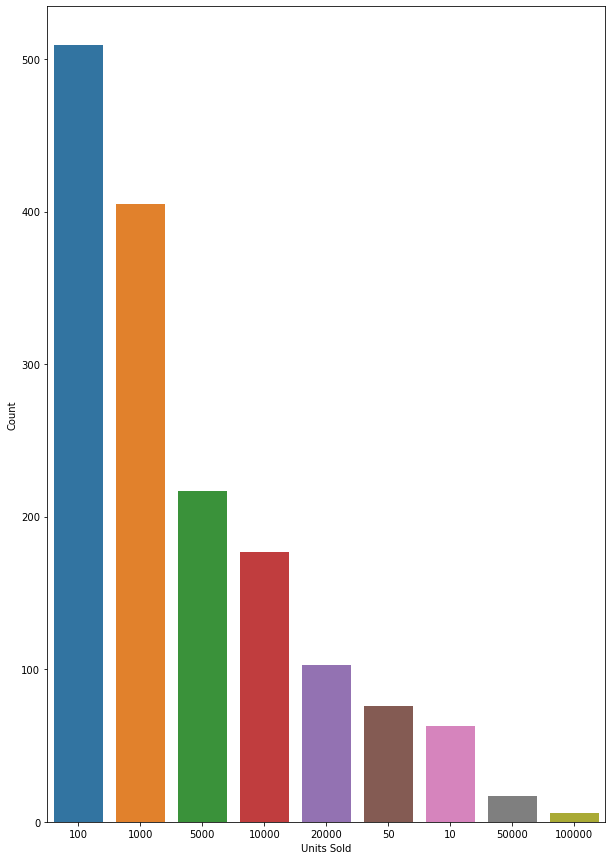

In [26]:
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('units_sold',
              data = salesData,
              order = salesData['units_sold'].value_counts().index,
              ax = ax)
ax.set(xlabel='Units Sold', ylabel='Count')
plt.show()

In [27]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1573 non-null   float64
 10  rating_four_count             1573 non-null   float64
 11  rating_three_count            1573 non-null   float64
 12  rating_two_count              1573 non-null   float64
 13  rat

# Popular product tags in Summer - 2020

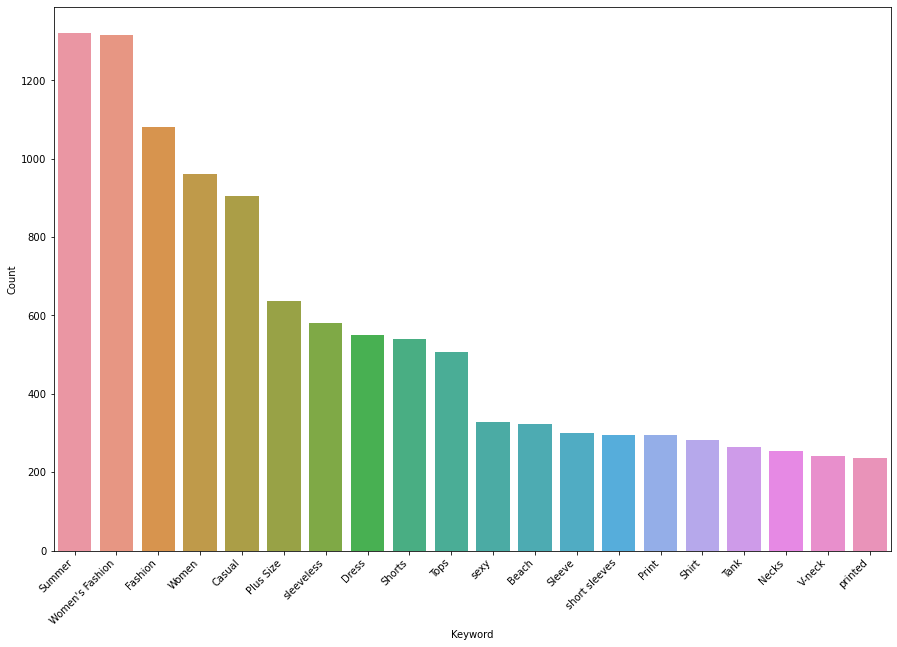

In [28]:
cate_data = pd.read_csv("input/unique-categories.sorted-by-count.csv")

fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'keyword',
            y = 'count',
            data = cate_data.iloc[:20],
            ax = ax)
ax.set(xlabel='Keyword', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Now let's create a column which indicates how many popular tags contain on a specific product tag**

In [29]:
pop_tags = cate_data.iloc[:10]['keyword'].tolist()

def check_tag_quality(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    
    common_elements = np.intersect1d(pop_tags, prod_tags)
    return len(common_elements) / len(pop_tags)
    
salesData['tag_quality'] = salesData['tags'].apply(check_tag_quality)

**Check the number of tags include in the product**

In [30]:
def tag_count(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    return len(prod_tags)
    
salesData['tag_count'] = salesData['tags'].apply(tag_count)

**Check whether the title was localised or not**

In [31]:
def is_localised(trans,origi):
    if trans == origi:
        return 0
    else:
        return 1
    
salesData['title_localised'] = salesData.apply(lambda x: is_localised(x.title, x.title_orig), 
                                               axis = 1)


**Check Merchant title and Merchant name**

In [32]:
def check_name(title,name):
    title = str(title).replace(" ", "")
    title = title.replace(".", "")
    
    name = str(name).replace(" ", "")
    name = name.replace(".", "")
    
    if title.lower() == name.lower():
        return 1
    else:
        return 0
    
salesData['com_same_name'] = salesData.apply(lambda x: check_name(x.merchant_title, x.merchant_name), 
                                             axis = 1)


**Check whether the merchant subtitle contains postive ratings**

In [33]:
def inc_positive_per(wordset):
    pos_ses = 'avis positifs'
    if f'{pos_ses}' in f'{wordset}':
        return 1
    else:
        return 0
    
salesData['subtitle_rating'] = salesData['merchant_info_subtitle'].apply(inc_positive_per)

In [34]:
def check_rating_prop(s_count,t_count):
    if s_count == 0:
        return 0
    else:
        return s_count/t_count
    
salesData['rating_five_count'] = salesData.apply(lambda x: check_rating_prop(x.rating_five_count, x.rating_count), 
                                             axis = 1)
salesData['rating_four_count'] = salesData.apply(lambda x: check_rating_prop(x.rating_four_count, x.rating_count), 
                                             axis = 1)
salesData['rating_three_count'] = salesData.apply(lambda x: check_rating_prop(x.rating_three_count, x.rating_count), 
                                             axis = 1)
salesData['rating_two_count'] = salesData.apply(lambda x: check_rating_prop(x.rating_two_count, x.rating_count), 
                                             axis = 1)
salesData['rating_one_count'] = salesData.apply(lambda x: check_rating_prop(x.rating_one_count, x.rating_count), 
                                             axis = 1)

In [35]:
def check_dis_per(r_price,buyer_price):
    return (r_price - buyer_price) / r_price
    
salesData['discount_rate'] = salesData.apply(lambda x: check_dis_per(x.retail_price, x.price),
                                             axis = 1)

In [36]:
def merchant_pop_on_prod(m_count,p_count):
    if m_count == 0:
        return 0
    else:
        return p_count / m_count
    
salesData['merch_pop_proc'] = salesData.apply(lambda x: merchant_pop_on_prod(x.merchant_rating_count, x.rating_count),
                                              axis = 1)

 # Correlation Heat Map

In [37]:
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(salesData.corr(),
            annot=True,
            ax=ax)
ax.add_patch(plt.Rectangle((0,2),31,1, 
                           fill = False, 
                           edgecolor = 'blue', 
                           lw = 3))
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

Major Factors which increases the **'units_sold'**

* Rating Count
* Rating
* Rating Five Count
* Rating Four Count
* Rating Three Count
* Merchant Rating Count
* Merchant Rating
* Merchant Has Profile Picture
* Is Title Localised
* Rating
* Badge Product Quality
* Badges Count
* Product Variation Inventory
* Number of Tags
* Title Localised
* Number Of Tags
* Have Rating on Merchant Subtitle
* High Retail Price
* High Buyer Price


Major Factors which decreases the **'units_sold'**

* Rating Two Count
* Rating One Count
* Price Increment
* Shipping Price Increment
* If Merchant title and Merchant name has differnt names
* No Urgency Banner
* High Price (Buyer Price)
* Lower discount rate (Buyer price compare to retail price)


**Special Note :-**

Add Boost does not have any significant change to the **'units_sold'**

# Remove Unwanted Columns

**rating_count** parameter is a driving factor for the **unit_sold**. It's obvious that **rating_count** increases the model accuracy. Since the model is predicting future sales we do not know **rating_count** for the model.

**Accroding to the above factor, star ratings (5 start, 4 start, ..) also need to be removed from the model. But the factor is first we need some sort of customer feedback about the product. Then merchant could buy enough stock to maximise the revenue or stop buying way too much of a product. So the below model could be used, If the merchant has some data about the first few weeks of sales.**

**NOTE**
> Thank you **@Anima Sharma** for your valuable feedback about previously developed model. Eventhough previous model had a high accuracy, it was a statistically wrong model for future sales prediction.


In [38]:
salesData = salesData.drop(['crawl_month','product_id','product_picture', 'product_url', 'merchant_profile_picture', 'merchant_id', 'currency_buyer'], axis = 1)
salesData = salesData.drop(['theme','urgency_text', 'merchant_title', 'merchant_name', 'merchant_info_subtitle'], axis = 1)
salesData = salesData.drop(['title','title_orig','tags'], axis = 1)
salesData = salesData.drop(['shipping_option_name'], axis = 1)
salesData = salesData.drop(['rating_count'], axis = 1)


# salesData = salesData.drop(['has_urgency_banner'], axis = 1)
# salesData = salesData.drop(['badge_fast_shipping','inventory_total'], axis = 1)
# salesData = salesData.drop(['countries_shipped_to'], axis = 1)
# salesData = salesData.drop(['rating_five_count','rating_four_count','rating_three_count','rating_two_count','rating_one_count'], axis = 1)

In [39]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   units_sold                    1573 non-null   int64  
 3   uses_ad_boosts                1573 non-null   int64  
 4   rating                        1573 non-null   float64
 5   rating_five_count             1573 non-null   float64
 6   rating_four_count             1573 non-null   float64
 7   rating_three_count            1573 non-null   float64
 8   rating_two_count              1573 non-null   float64
 9   rating_one_count              1573 non-null   float64
 10  badges_count                  1573 non-null   int64  
 11  badge_local_product           1573 non-null   int64  
 12  badge_product_quality         1573 non-null   int64  
 13  bad

# Create Model to predict Units Sold

In [40]:
salesData = pd.get_dummies(salesData, 
                           columns = ['product_color'],
                           prefix = 'color_',
                           drop_first = True)
salesData.head()

price  retail_price  units_sold  uses_ad_boosts  rating  rating_five_count  \
0  16.00            14         100               0    3.76           0.481481   
1   8.00            22       20000               1    3.45           0.369845   
2   8.00            43         100               0    3.57           0.357143   
3   8.00             8        5000               1    4.03           0.509499   
4   2.72             3         100               1    3.10           0.300000   

   rating_four_count  rating_three_count  rating_two_count  rating_one_count  \
0           0.148148            0.185185          0.018519          0.166667   
1           0.167400            0.182233          0.104971          0.175550   
2           0.285714            0.142857          0.000000          0.214286   
3           0.205527            0.150259          0.072539          0.062176   
4           0.200000            0.100000          0.100000          0.300000   

   ...  color__watermelonred  color__white  color__white & black  \
0  ...                     0             1                     0   
1  ...                     0             0                     0   
2  ...                     0             0                     0   
3  ...                     0             0                     0   
4  ...                     0             0                     0   

   color__white & red color__whitefloral  color__whitestripe  color__wine  \
0                   0                  0                   0            0   
1                   0                  0                   0            0   
2                   0                  0                   0            0   
3                   0                  0                   0            0   
4                   0                  0                   0            0   

   color__wine red  color__winered & yellow  color__yellow  
0                0                        0              0  
1                0                        0              0  
2                0                        0              0  
3                0                        0              0  
4                0                        0              1  

[5 rows x 109 columns]

In [41]:
salesData = pd.get_dummies(salesData, 
                           columns = ['product_variation_size_id'],
                           prefix = 'size_',
                           drop_first = True)
salesData.head()

price  retail_price  units_sold  uses_ad_boosts  rating  rating_five_count  \
0  16.00            14         100               0    3.76           0.481481   
1   8.00            22       20000               1    3.45           0.369845   
2   8.00            43         100               0    3.57           0.357143   
3   8.00             8        5000               1    4.03           0.509499   
4   2.72             3         100               1    3.10           0.300000   

   rating_four_count  rating_three_count  rating_two_count  rating_one_count  \
0           0.148148            0.185185          0.018519          0.166667   
1           0.167400            0.182233          0.104971          0.175550   
2           0.285714            0.142857          0.000000          0.214286   
3           0.205527            0.150259          0.072539          0.062176   
4           0.200000            0.100000          0.100000          0.300000   

   ...  size__M  size__OTHER  size__S  size__XL  size__XS  size__XXL  \
0  ...        1            0        0         0         0          0   
1  ...        0            0        0         0         1          0   
2  ...        0            0        0         0         1          0   
3  ...        1            0        0         0         0          0   
4  ...        0            0        1         0         0          0   

   size__XXS  size__XXXS  size__XXXXL  size__XXXXXL  
0          0           0            0             0  
1          0           0            0             0  
2          0           0            0             0  
3          0           0            0             0  
4          0           0            0             0  

[5 rows x 118 columns]

In [42]:
salesData = pd.get_dummies(salesData, 
                           columns = ['origin_country'],
                           prefix = 'country_',
                           drop_first = True)
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Columns: 119 entries, price to country__US
dtypes: float64(12), int64(18), uint8(89)
memory usage: 505.5 KB


In [43]:
from sklearn.model_selection import train_test_split

r_state = 3
X = salesData.drop(['units_sold'], axis = 1)
y = salesData['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = r_state)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

classifier_DTC = DecisionTreeClassifier(random_state = r_state)
classifier_DTC.fit(X_train, y_train)

y_pred_DTC = classifier_DTC.predict(X_test)
accuracy_score(y_test, y_pred_DTC)

0.6952380952380952

In [45]:
from sklearn.svm import SVC

classifier_SVC = SVC(random_state = r_state)
classifier_SVC.fit(X_train, y_train)

y_pred_SVC = classifier_SVC.predict(X_test)
accuracy_score(y_test, y_pred_SVC)

0.326984126984127

In [46]:
from sklearn.ensemble import AdaBoostClassifier

classifier_ABC = AdaBoostClassifier(learning_rate = 0.01,
                                   random_state = r_state) # Default using Decision Tree Classifier
classifier_ABC.fit(X_train, y_train)

y_pred_ABC = classifier_ABC.predict(X_test)
accuracy_score(y_test, y_pred_ABC)

0.3238095238095238

In [47]:
from sklearn.ensemble import RandomForestClassifier

classifier_RFC = RandomForestClassifier(random_state = r_state)
classifier_RFC.fit(X_train, y_train)

y_pred_RFC = classifier_RFC.predict(X_test)
accuracy_score(y_test, y_pred_RFC)

0.6222222222222222

In [48]:
classifier_ABC_RF = AdaBoostClassifier(RandomForestClassifier(random_state = r_state),
                                       learning_rate = 0.01,
                                       random_state = r_state) 
classifier_ABC_RF.fit(X_train, y_train)

y_pred_ABC_RF = classifier_ABC_RF.predict(X_test)
accuracy_score(y_test, y_pred_ABC_RF)

0.6253968253968254

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_GBC = GradientBoostingClassifier(random_state = r_state)
classifier_GBC.fit(X_train, y_train)

y_pred_GBC = classifier_GBC.predict(X_test)
accuracy_score(y_test, y_pred_GBC)

0.726984126984127

In [50]:
from sklearn.neighbors import KNeighborsClassifier

classifier_KNN = KNeighborsClassifier(n_neighbors = 5)
classifier_KNN.fit(X_train, y_train)

y_pred_KNN = classifier_KNN.predict(X_test)
accuracy_score(y_test, y_pred_KNN)

0.29523809523809524

In [51]:
from xgboost import XGBClassifier

classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train)

y_pred_XGB = classifier_XGB.predict(X_test)
accuracy_score(y_test, y_pred_XGB)

0.7174603174603175

In [52]:
from sklearn.model_selection import cross_val_score

classifiers = [classifier_DTC, 
               classifier_SVC,
               classifier_ABC, 
               classifier_RFC, 
               classifier_ABC_RF, 
               classifier_GBC, 
               classifier_KNN, 
               classifier_XGB]
classifiers_names = ['Decision Tree',
                     'SVC', 
                     'AdaBoost',
                     'Random Forest',
                     'AdaBoost - Random Forest',
                     'Gradient Boosting',
                     'KNeighborsClassifier',
                     'XG Boost']
accuracy_mean = []

for cl in classifiers :
    accuracies = cross_val_score(estimator = cl, 
                                 X = X_train, 
                                 y = y_train, 
                                 cv = 4)
    accuracy_mean.append(accuracies.mean()*100)

    
accuracy_df = pd.DataFrame({'Classifier': classifiers_names,
                           'Accuracy Mean': accuracy_mean})
accuracy_df.sort_values('Accuracy Mean',ascending=False)

Classifier  Accuracy Mean
5         Gradient Boosting      68.839854
7                  XG Boost      68.520119
0             Decision Tree      62.637246
4  AdaBoost - Random Forest      60.812102
3             Random Forest      60.571985
1                       SVC      34.341573
6      KNeighborsClassifier      34.259933
2                  AdaBoost      29.415630

In [53]:
from sklearn.ensemble import VotingClassifier

voting_cl = VotingClassifier(estimators = [('Gradient Boosting', classifier_GBC),
                                              ('Decision Tree',classifier_RFC),
                                              ('XG Boost',classifier_DTC)], 
                                voting = 'hard')
voting_cl.fit(X_train, y_train)
y_pred_vcl = voting_cl.predict(X_test)
accuracy_score(y_test, y_pred_vcl)

0.7111111111111111

**Get Class weights**

In [54]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights_set = class_weight.compute_class_weight('balanced',
                                                      np.unique(y_train),
                                                      y_train)

# Print the class weights
# class_weights_set

class_weights_set = dict(zip(np.unique(y_train), class_weights_set))
class_weights_set

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[    10     50    100   1000   5000  10000  20000  50000 100000], y=677      1000
316       100
1263      100
355        50
548     20000
        ...  
789        10
256     20000
968      1000
952     50000
1273      100
Name: units_sold, Length: 1258, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


{10: 2.6880341880341883,
 50: 2.29143897996357,
 100: 0.3376274825550188,
 1000: 0.4327485380116959,
 5000: 0.7852684144818977,
 10000: 1.067005937234945,
 20000: 1.6840696117804552,
 50000: 11.648148148148149,
 100000: 34.94444444444444}

In [55]:
# from sklearn.model_selection import GridSearchCV

# gb_params = [{'loss': ['deviance', 'exponential'], 
#               'learning_rate': [0.1, 0.01, 0.001],
#               'n_estimators': [100, 250, 500]}]
# grid_search_GBC = GridSearchCV(estimator = classifier_GBC,
#                                param_grid = gb_params,
#                                scoring = 'accuracy',
#                                cv = 4,
#                                n_jobs = -1)
# grid_search_GBC.fit(X_train, y_train)
# best_accuracy_GBC = grid_search_GBC.best_score_
# best_parameters_GBC = grid_search_GBC.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy_GBC*100))
# print("Best Parameters:", best_parameters_GBC)


**Optimal Settings**

> Best Accuracy: 68.84 %
> Best Parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 100}

In [56]:
optimised_GBC = GradientBoostingClassifier(random_state = r_state,
                                       loss = 'deviance',
                                       learning_rate = 0.1,
                                       n_estimators = 100)
optimised_GBC.fit(X_train, y_train)
y_pred_GBC = optimised_GBC.predict(X_test)
accuracy_score(y_test, y_pred_GBC)

0.726984126984127

# Best Model for the Wish Summer Sale is Gradient Boosting Classifier

